In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import random

# Number of data points
num_points = 100

# Generate random data points
data_points = {i + 1: (random.uniform(1, 10), random.uniform(1, 10)) for i in range(num_points)}

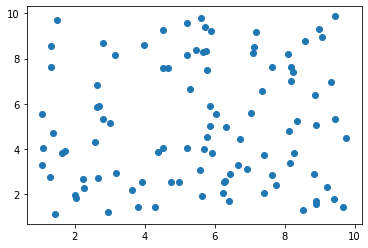

In [11]:
xs = [x for x,_ in data_points.values()]
ys = [y for _,y in data_points.values()]
plt.scatter(xs,ys)

In [4]:
data_points

{1: (7.79075531850164, 9.682520454244916),
 2: (3.18336492377123, 2.555473464174209),
 3: (3.301638066456686, 6.626223711405627),
 4: (1.2246475241245052, 8.387562987203985),
 5: (9.807723981693158, 4.035287875807311),
 6: (1.5825345461582532, 5.678708251858512),
 7: (5.150108510786445, 5.337204096243841),
 8: (2.919459698499988, 5.994914792493913),
 9: (2.941098409228669, 8.907806722693312),
 10: (6.61950597502458, 9.73869448511601),
 11: (3.615824269148346, 5.979846436592315),
 12: (6.425170322485039, 4.275356625153177),
 13: (8.150174596826162, 6.764276567809847),
 14: (9.299697623461888, 7.532430672541988),
 15: (4.360648818836585, 5.528940501588942),
 16: (9.652373399641911, 6.111811835409771),
 17: (3.5296190388176476, 3.525368990472062),
 18: (4.7949307931829335, 1.4388012055713868),
 19: (9.783843035114941, 2.6232777157268083),
 20: (8.955445834710954, 1.7911391844279771)}

In [5]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((float(x2) - x1)**2 + (y2 - y1)**2)
    return round(distance,2)

def compute_centroid(pts):
    xs = [data_points[p][0] for p in pts]
    ys = [data_points[p][1] for p in pts]
    
    mean_x = float(sum(xs))/len(xs)
    mean_y = float(sum(ys))/len(ys)
    
    return (mean_x, mean_y)

In [6]:
def join(cluster, points):
    for p in points:
        if type(p) == int:
            cluster.append(p)
        else:
            cluster.extend(p)
    return cluster

In [7]:
def compute_proximity_vals(data):
    n = len(data.keys())
    clusters = list(data.keys())
    pq = []
    for i in range(n):
        for j in range(i+1, n):
            c1, c2 = clusters[i], clusters[j]
            p1 = data[c1]
            p2 = data[c2]
            heappush(pq, (euclidean_distance(p1,p2), [c1,c2]))
    return pq

In [8]:
from heapq import heappush, heappop

def get_clusters(data):
    
    prox_vals = compute_proximity_vals(data)
    min_d, pts = heappop(prox_vals)
    joined_cs = [p for p in pts]
    new_cluster = join([], pts)
#     print(prox_vals)
    if len(prox_vals) != 0:
        while min_d == prox_vals[0][0]:
            _, pts = heappop(prox_vals)
            new_cluster = join(new_cluster, pts)
            joined_cs.extend(pts)
    
    print("joined", joined_cs)
    cluster_center = compute_centroid(new_cluster)
    new_data = {k:v for k,v in data.items() if k not in joined_cs}
    new_data[tuple(new_cluster)] = cluster_center
    
    return new_data

In [9]:
clusters = []
current_clusters = {(k): v for k, v in data_points.items()}
clusters.append(current_clusters)
# print("clusters:\n", current_clusters)
while len(current_clusters.keys()) != 1:
    current_clusters = get_clusters(current_clusters)
    print("current_clusters:",list(current_clusters.keys()))
    
    clusters.append(current_clusters)

joined [8, 11]
current_clusters: [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, (8, 11)]
joined [3, (8, 11)]
current_clusters: [1, 2, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, (3, 8, 11)]
joined [7, 15]
current_clusters: [1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, (3, 8, 11), (7, 15)]
joined [2, 17]
current_clusters: [1, 4, 5, 6, 9, 10, 12, 13, 14, 16, 18, 19, 20, (3, 8, 11), (7, 15), (2, 17)]
joined [1, 10, 19, 20]
current_clusters: [4, 5, 6, 9, 12, 13, 14, 16, 18, (3, 8, 11), (7, 15), (2, 17), (1, 10, 19, 20)]
joined [13, (1, 10, 19, 20)]
current_clusters: [4, 5, 6, 9, 12, 14, 16, 18, (3, 8, 11), (7, 15), (2, 17), (13, 1, 10, 19, 20)]
joined [16, (13, 1, 10, 19, 20)]
current_clusters: [4, 5, 6, 9, 12, 14, 18, (3, 8, 11), (7, 15), (2, 17), (16, 13, 1, 10, 19, 20)]
joined [14, (16, 13, 1, 10, 19, 20)]
current_clusters: [4, 5, 6, 9, 12, 18, (3, 8, 11), (7, 15), (2, 17), (14, 16, 13, 1, 10, 19, 20)]
joined [(3, 8, 11), (7, 15)]
current_clusters: 